In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


Task 1: Finding the frequencies of crimes by the hour of occurrence

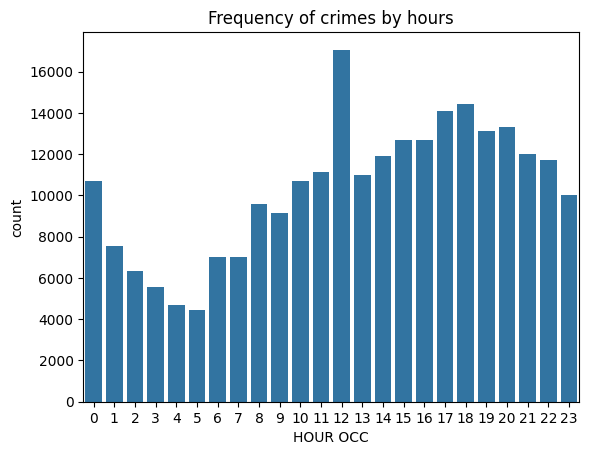

Peak Crime Hour : 12
Count : 17065


In [135]:
# Convert data type
crimes ['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Finding crime peak hours and visualizing crime frequency by hour
crime_hours = crimes.value_counts('HOUR OCC').reset_index()
peak_crime_hour = crime_hours.iloc[0, 0]

sns.countplot(data = crimes, x = 'HOUR OCC').set(title = 'Frequency of crimes by hours')
plt.show()

print(f"Peak Crime Hour : {peak_crime_hour}\nCount : {crime_hours.iloc[0, 1]}")

TASK 2: Identifying the area with the most night crime

The area with the largest volume of night crime is Central


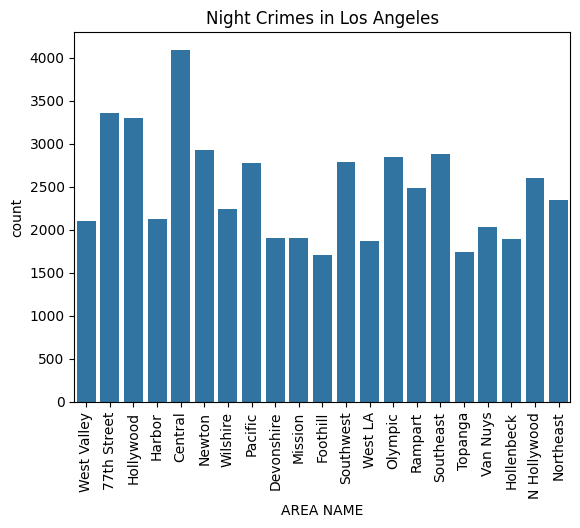

In [136]:
# Filter night crimes
end_of_day = crimes[crimes['HOUR OCC'].isin([22,23])].sort_values(by='HOUR OCC')
begin_of_day = crimes[crimes['HOUR OCC'].isin([0,1,2,3])].sort_values(by='HOUR OCC')
night_crimes = pd.concat([end_of_day,begin_of_day],ignore_index=True)
night_crimes

# Peak night crime location
peak_night_crime_location = crimes.value_counts('AREA NAME').reset_index().iloc[0,0]
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

# Visualization
sns.countplot( data = night_crimes, x = 'AREA NAME').set(title = 'Night Crimes in Los Angeles')
plt.xticks(rotation=90)
plt.show()

TASK 3: Crimes by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)

In [137]:
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
